In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df

,768,8,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

In [5]:
df.drop(index = 0,inplace = True)

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df = df.apply(pd.to_numeric, errors='coerce')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


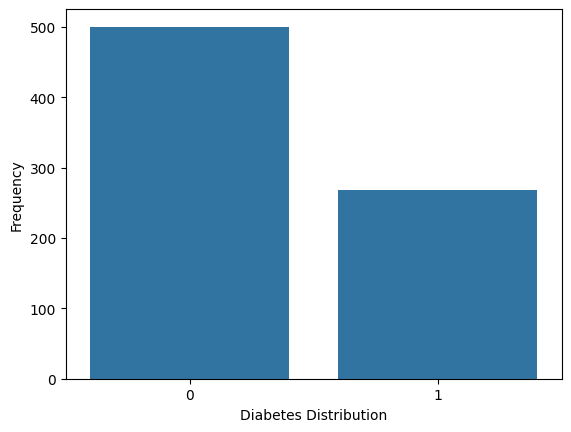

In [10]:
sns.countplot(x = 'Outcome',data = df)
plt.xlabel('Diabetes Distribution')
plt.ylabel('Frequency')
plt.show()

In [23]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols:
    print(col, (df[col] == 0).sum())


Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 0
Insulin 374
BMI 11


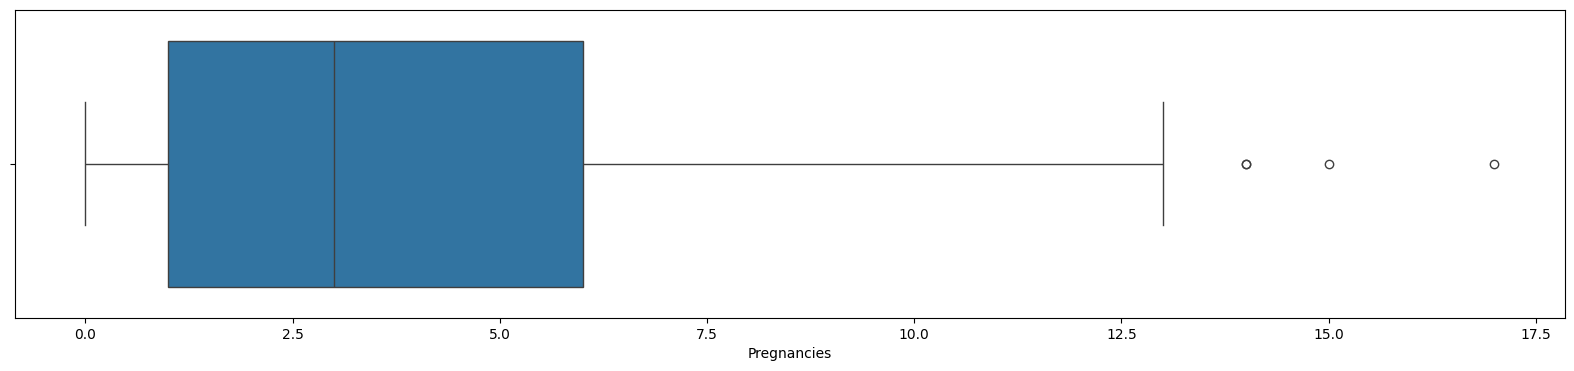

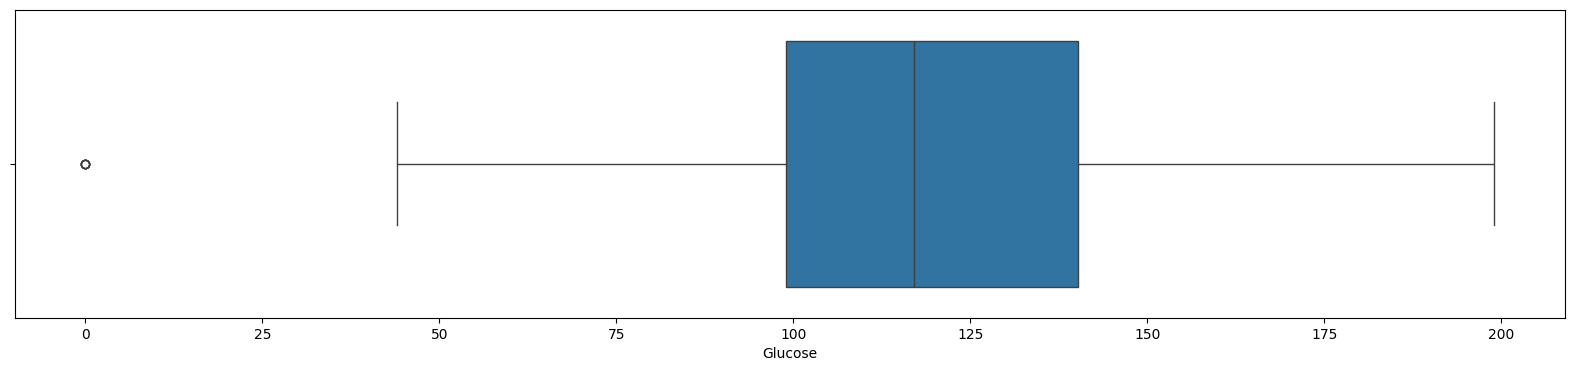

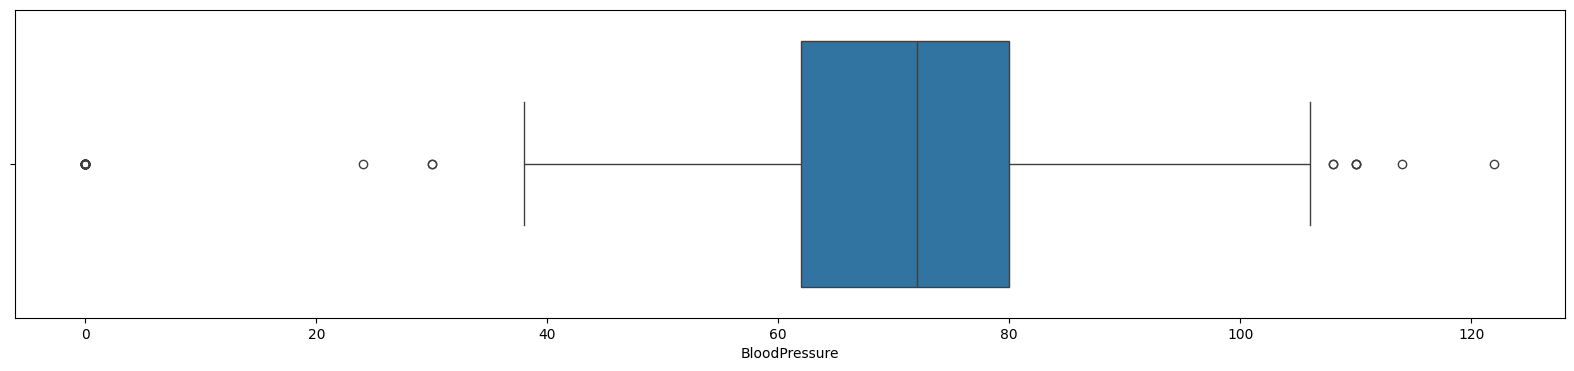

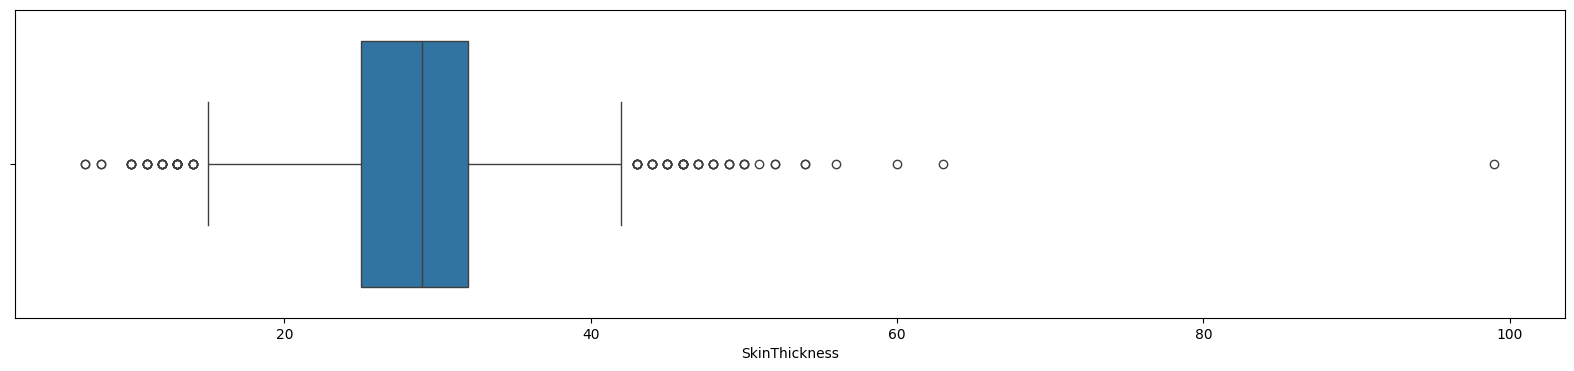

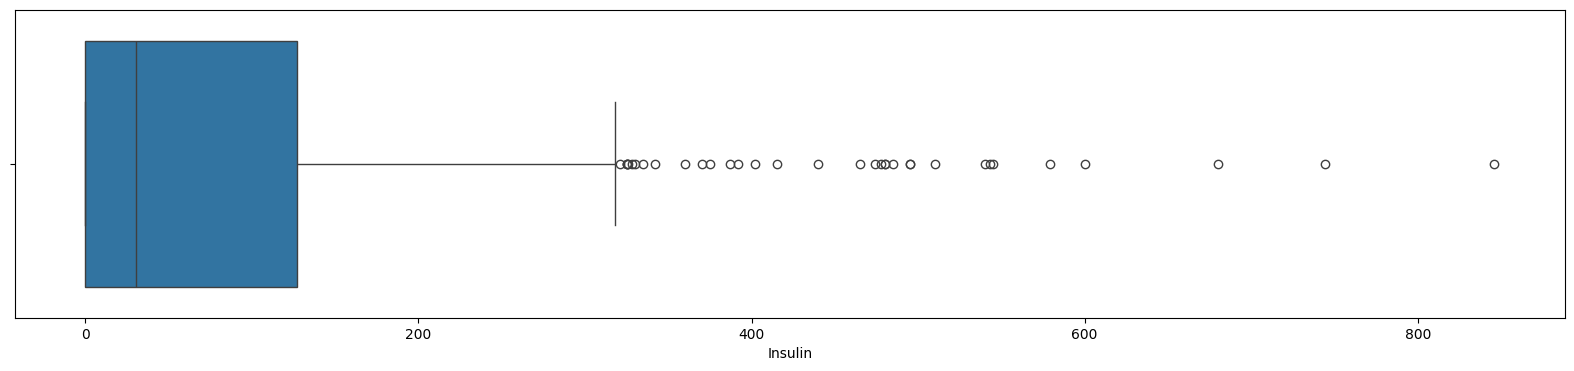

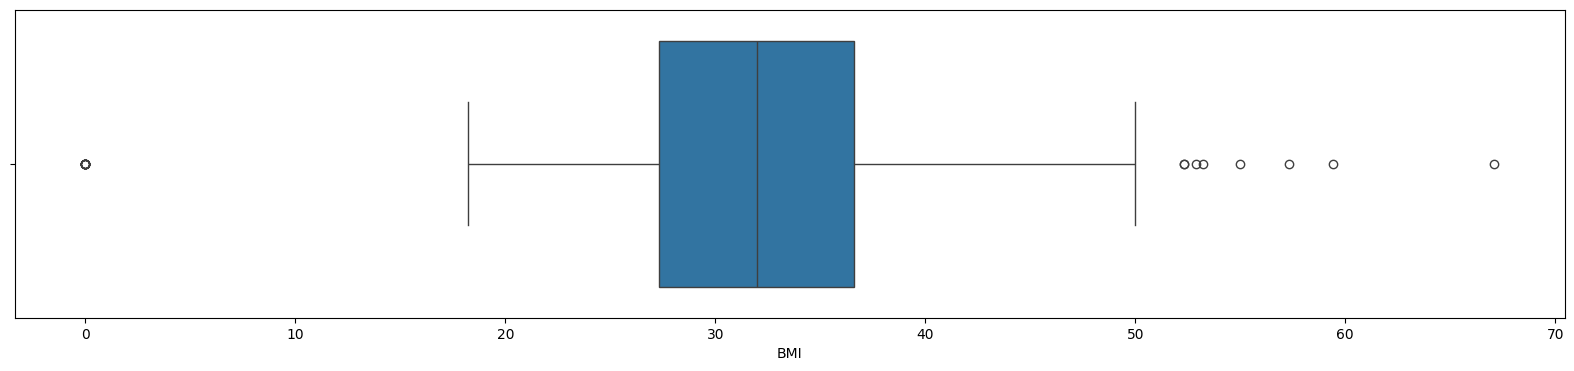

In [24]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols:
    plt.figure(figsize=(20,4))
    sns.boxplot(x = i,data=df)
    plt.show()


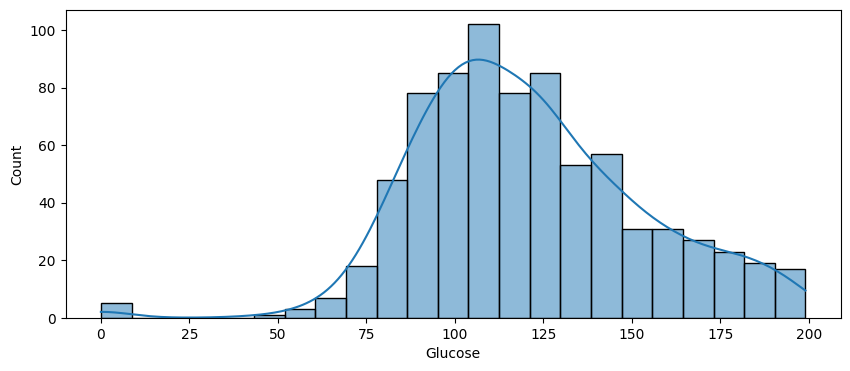

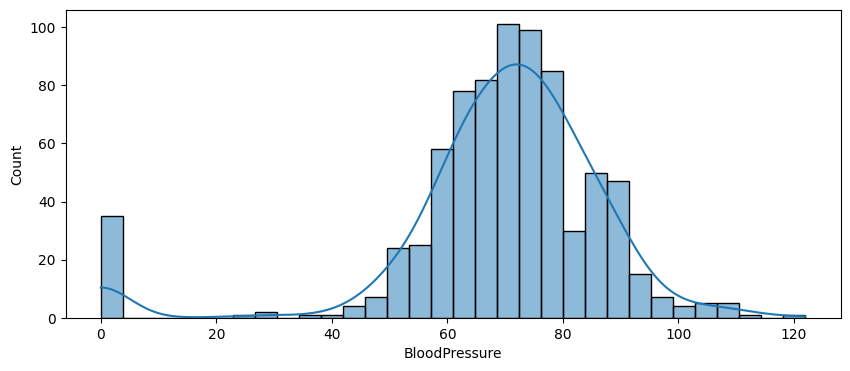

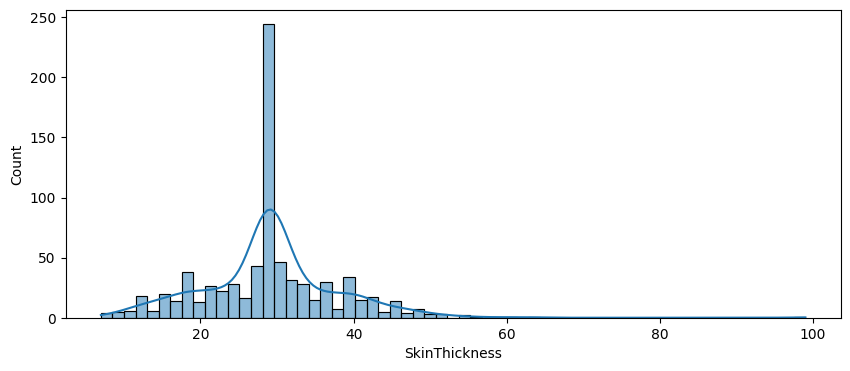

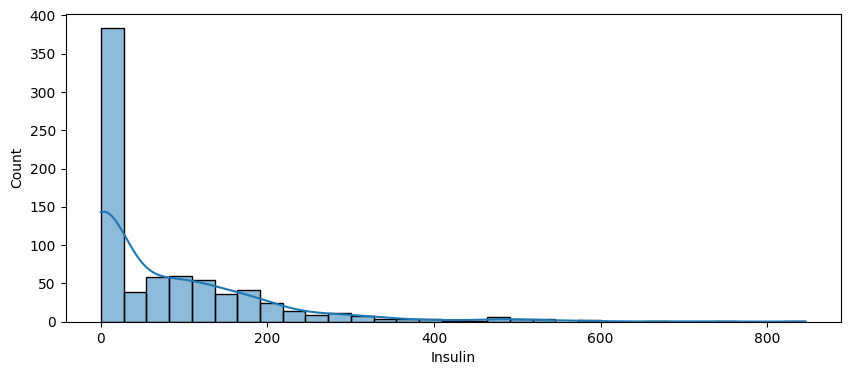

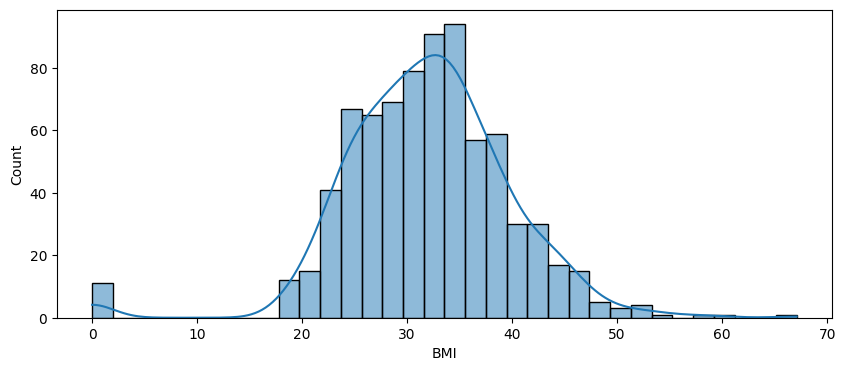

In [22]:
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in cols:
    plt.figure(figsize=(10,4))
    sns.histplot(x = i,data=df,kde = True)
    plt.show()

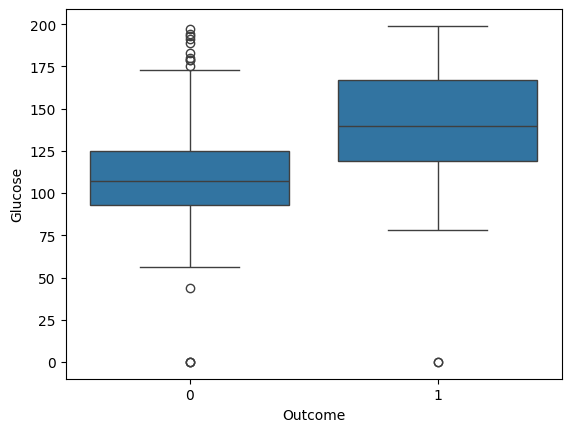

In [15]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.show()


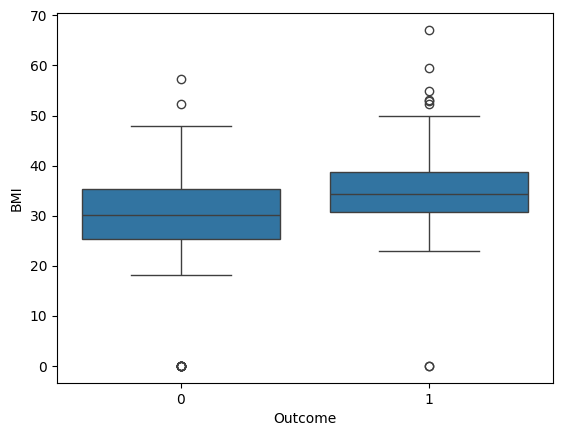

In [16]:
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.show()


In [20]:
df['SkinThickness'].replace(0, np.nan, inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)


/var/folders/5b/vf5hrqmd0z7_801v82j5pb680000gn/T/ipykernel_75358/2440847983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SkinThickness'].replace(0, np.nan, inplace=True)


In [25]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |
          (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [26]:
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35.0,0,33.6,0.627,50,1
2,1,85,66,29.0,0,26.6,0.351,31,0
3,8,183,64,29.0,0,23.3,0.672,32,1
4,1,89,66,23.0,94,28.1,0.167,21,0
6,5,116,74,29.0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,9,89,62,29.0,0,22.5,0.142,33,0
765,2,122,70,27.0,0,36.8,0.340,27,0
766,5,121,72,23.0,112,26.2,0.245,30,0
767,1,126,60,29.0,0,30.1,0.349,47,1


In [27]:
df_cleaned['Outcome'].value_counts()

Outcome
0    385
1    182
Name: count, dtype: int64

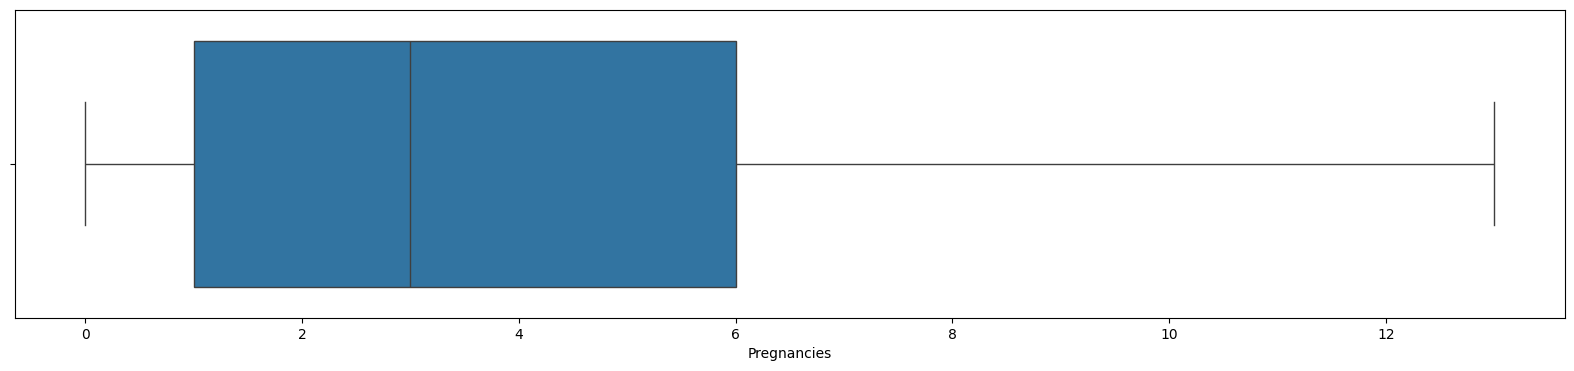

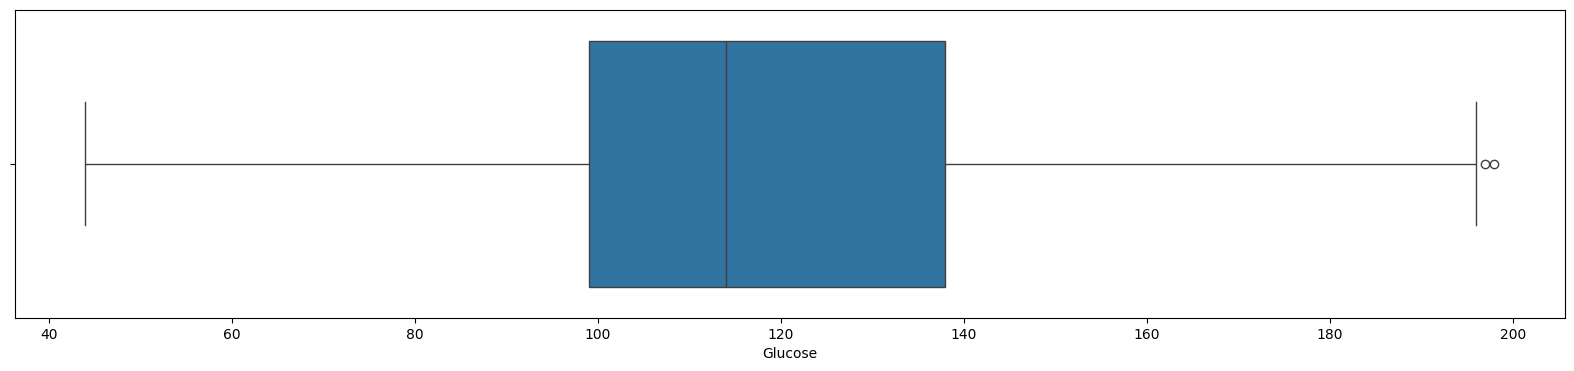

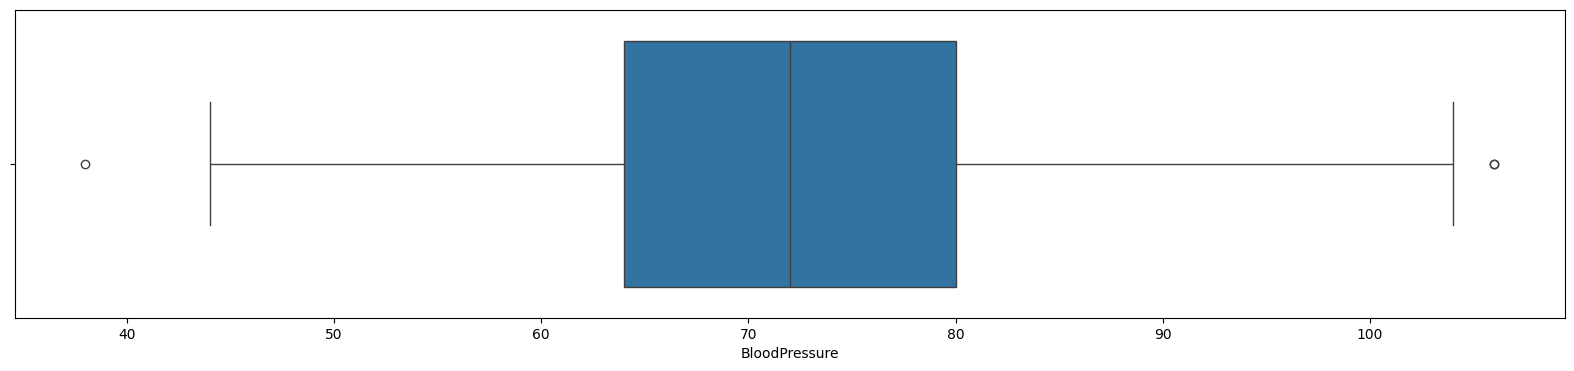

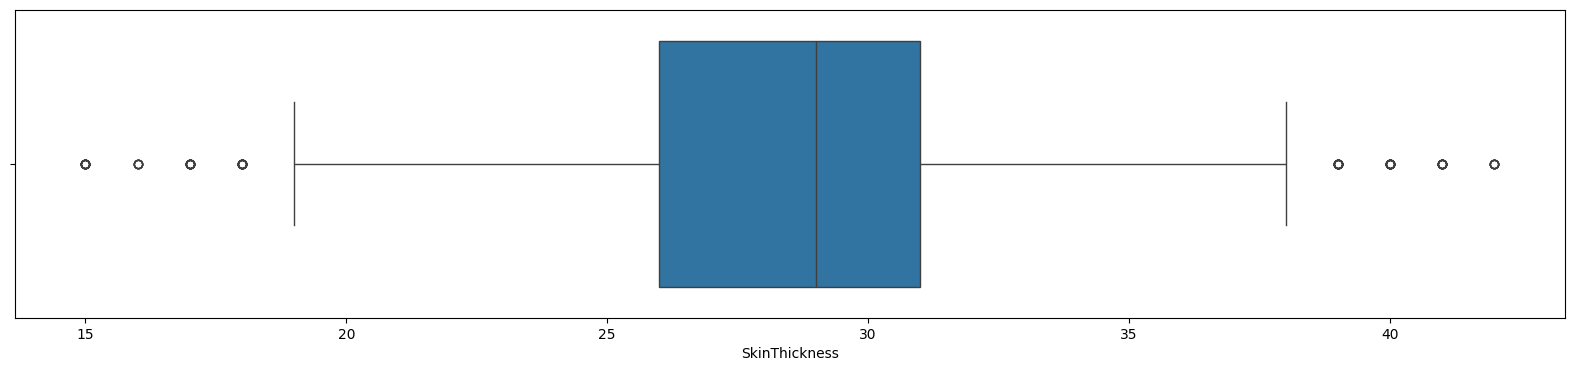

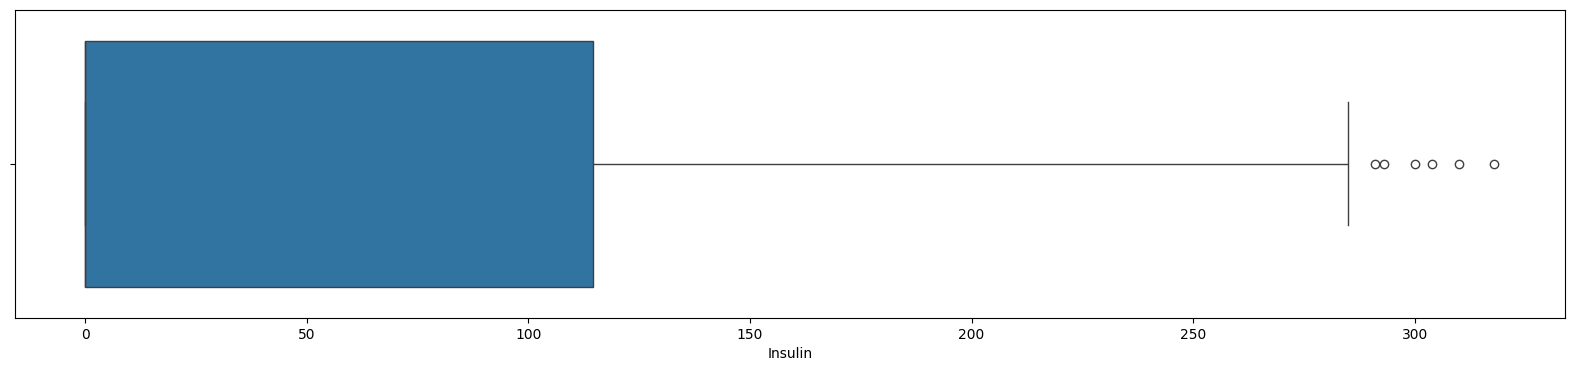

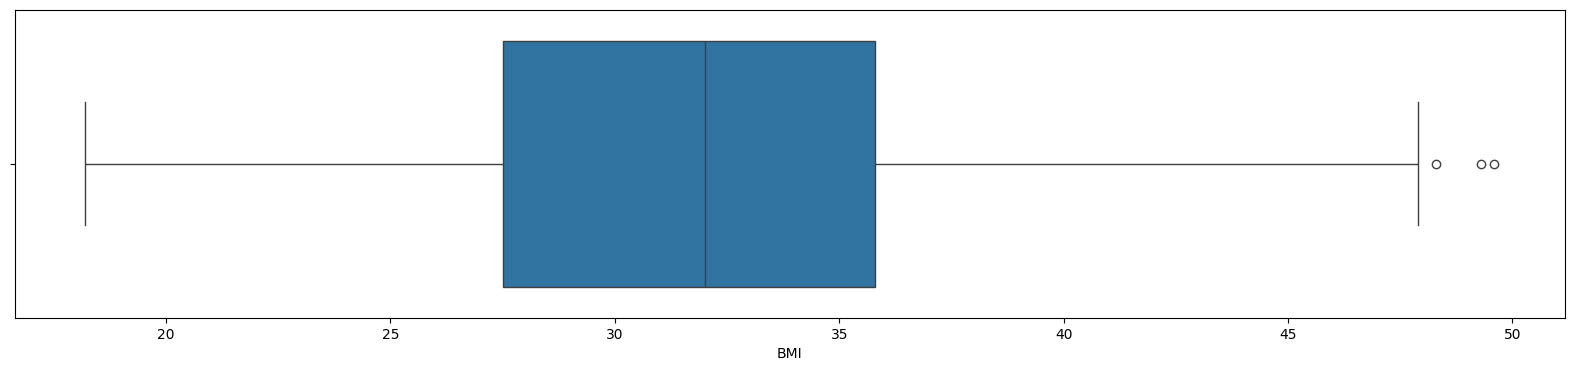

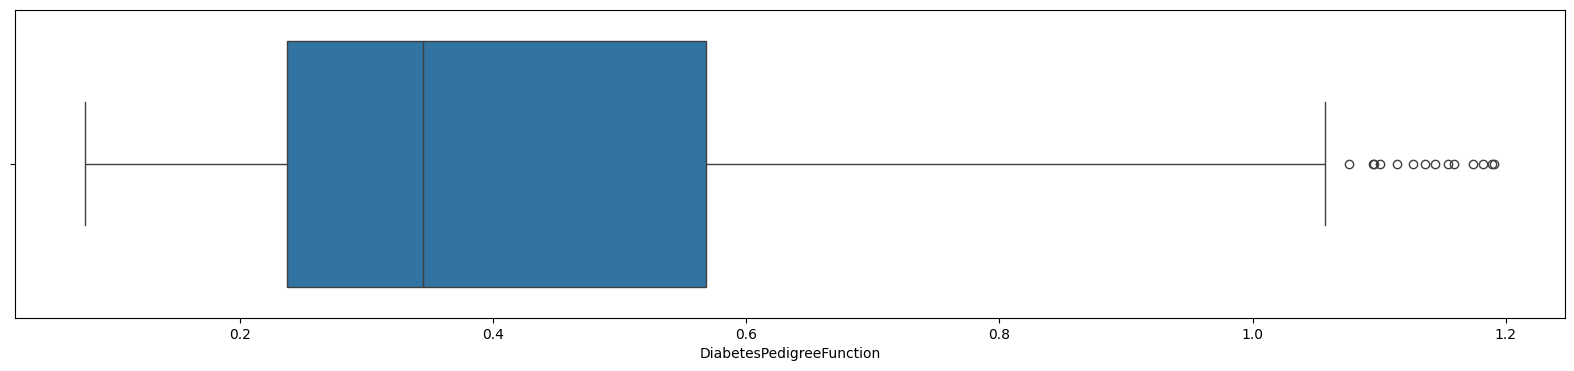

In [30]:
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']

for i in cols:
    plt.figure(figsize=(20,4))
    sns.boxplot(x = i,data=df_cleaned)
    plt.show()


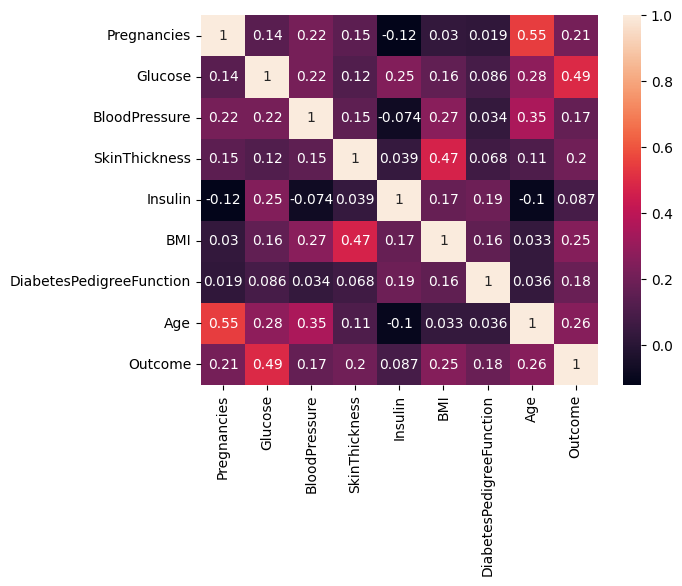

In [28]:
sns.heatmap(df_cleaned.corr(), annot = True)
plt.show()

In [86]:
X = df_cleaned[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Age']]
y = df_cleaned['Outcome']

In [87]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
model = RandomForestClassifier()

In [91]:
model.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
y_pred = model.predict(x_train)

In [93]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       308
           1       1.00      1.00      1.00       145

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



In [57]:
model.feature_importances_

array([0.08739433, 0.25965007, 0.08279634, 0.07755086, 0.06345025,
       0.1503612 , 0.14130182, 0.13749513])

In [218]:
model2 = RandomForestClassifier(
    n_estimators= 300,
    max_depth= 15,
    min_samples_leaf=10,
    random_state=42

)

In [219]:
X = df_cleaned[['Pregnancies','Glucose','BloodPressure','BMI','Age']]
y = df_cleaned['Outcome']

In [220]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [221]:
model2.fit(x_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [222]:
y_pred_m2 = model2.predict(x_train)

In [223]:
print(classification_report(y_train,y_pred_m2))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       308
           1       0.81      0.63      0.71       145

    accuracy                           0.84       453
   macro avg       0.83      0.78      0.80       453
weighted avg       0.83      0.84      0.83       453



In [224]:
log2 = LogisticRegression()

In [225]:
log2.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [229]:
y_pred_m2 = log2.predict(x_train)

In [230]:
print(classification_report(y_train,y_pred_m2))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       308
           1       0.69      0.52      0.59       145

    accuracy                           0.77       453
   macro avg       0.75      0.71      0.72       453
weighted avg       0.76      0.77      0.76       453



# XGb

In [338]:
xgb = XGBClassifier(
     n_estimators=200,
    max_depth=10,
    max_leaves = 5,
    learning_rate=0.09,
    random_state=42,
)

In [339]:
xgb.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [340]:
y_pred_xgb_train = xgb.predict(x_train)
print(classification_report(y_train,y_pred_xgb_train))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       308
           1       0.89      0.81      0.85       145

    accuracy                           0.91       453
   macro avg       0.90      0.88      0.89       453
weighted avg       0.91      0.91      0.91       453



In [341]:
y_pred_xgb = xgb.predict(x_test)

In [342]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.70      0.70      0.70        37

    accuracy                           0.81       114
   macro avg       0.78      0.78      0.78       114
weighted avg       0.81      0.81      0.81       114



In [343]:
import joblib

joblib.dump(xgb, "xgb_model.joblib")

['xgb_model.joblib']